
# Business Cases with Data Science 

## Case 1: Customer Segmentation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Ana Claudia Alferes (M20190932)
2. Pedro Santos (M20190420)
3. Michael Machatschek (M20190054)
4. Lennart Dangers (M20190251)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

# Data Understanding

## Dataset Description

 Description of each variable 
 
 - var 1 ...
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pycountry_convert as pc

In [54]:
path = "https://raw.githubusercontent.com/lennartda/business_cases_C1/master/Data/Dataset.csv"
df = pd.read_csv(path, sep=";")

In [55]:
#Set ID as an Index: Check if ID only contains unique values
#df.shape: (111733, 29)
#df["ID"].nunique(): 111733
df = df.set_index('ID')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMediumFloor           111733 non-null int64
SRBa

In [57]:
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561,NaN,NaN,NaN,45.6392,17.245,-10,33,47,58,123
DaysSinceCreation,111733,NaN,NaN,NaN,595.027,374.657,36,288,522,889,1385
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733,NaN,NaN,NaN,60.8331,85.1153,-1,0,21,95,588
LodgingRevenue,111733,NaN,NaN,NaN,283.851,379.132,0,0,208,393.3,21781
OtherRevenue,111733,NaN,NaN,NaN,64.6828,123.581,0,0,31,84,8859.25
BookingsCanceled,111733,NaN,NaN,NaN,0.00228223,0.0806315,0,0,0,0,15
BookingsNoShowed,111733,NaN,NaN,NaN,0.000599644,0.0282168,0,0,0,0,3


In [58]:
df.isnull().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [59]:
# Check counts of categorical variables (excluding nationality)
cols = ['MarketSegment']
df[cols].apply(pd.Series.value_counts)

,MarketSegment
Other,63680
Direct,16363
Travel Agent/Operator,16353
Groups,11461
Corporate,2931
Complementary,657
Aviation,288


In [60]:
cols = ['DistributionChannel']
df[cols].apply(pd.Series.value_counts)

,DistributionChannel
Travel Agent/Operator,91019
Direct,16883
Corporate,3135
GDS Systems,696


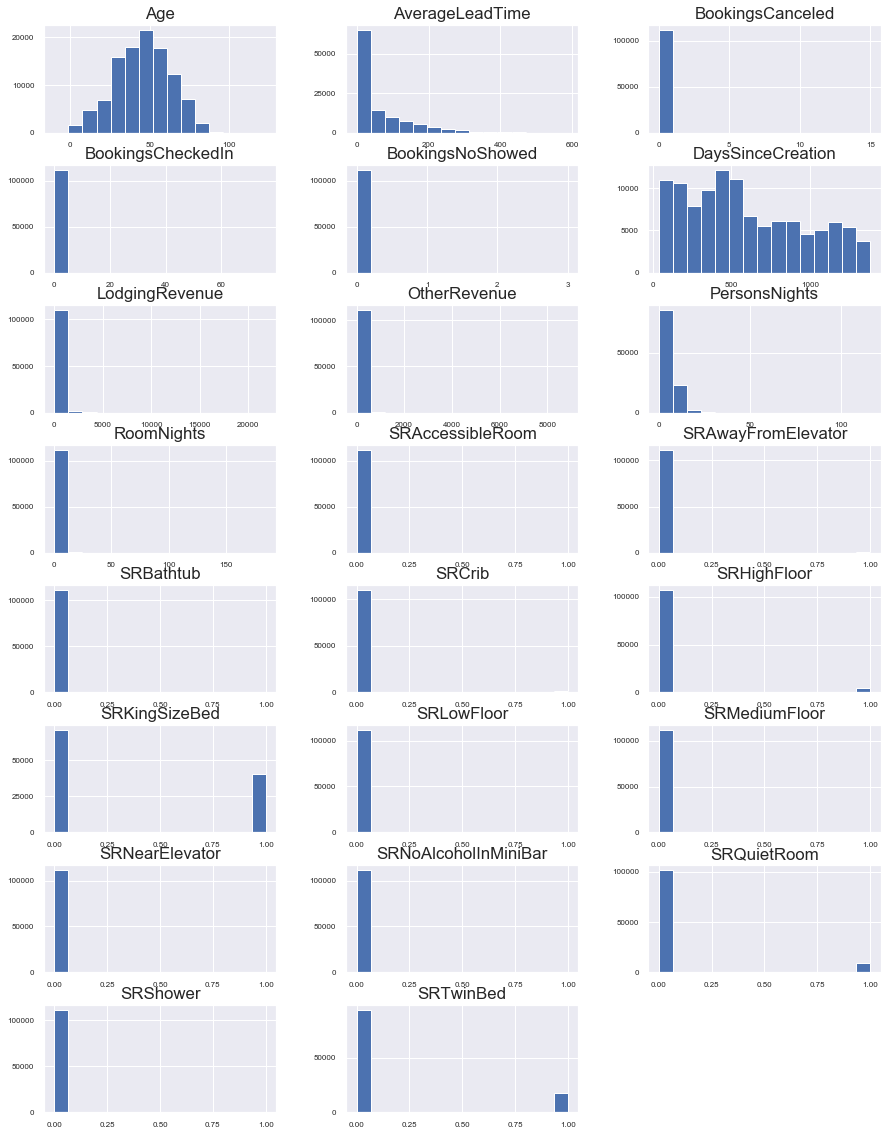

In [61]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

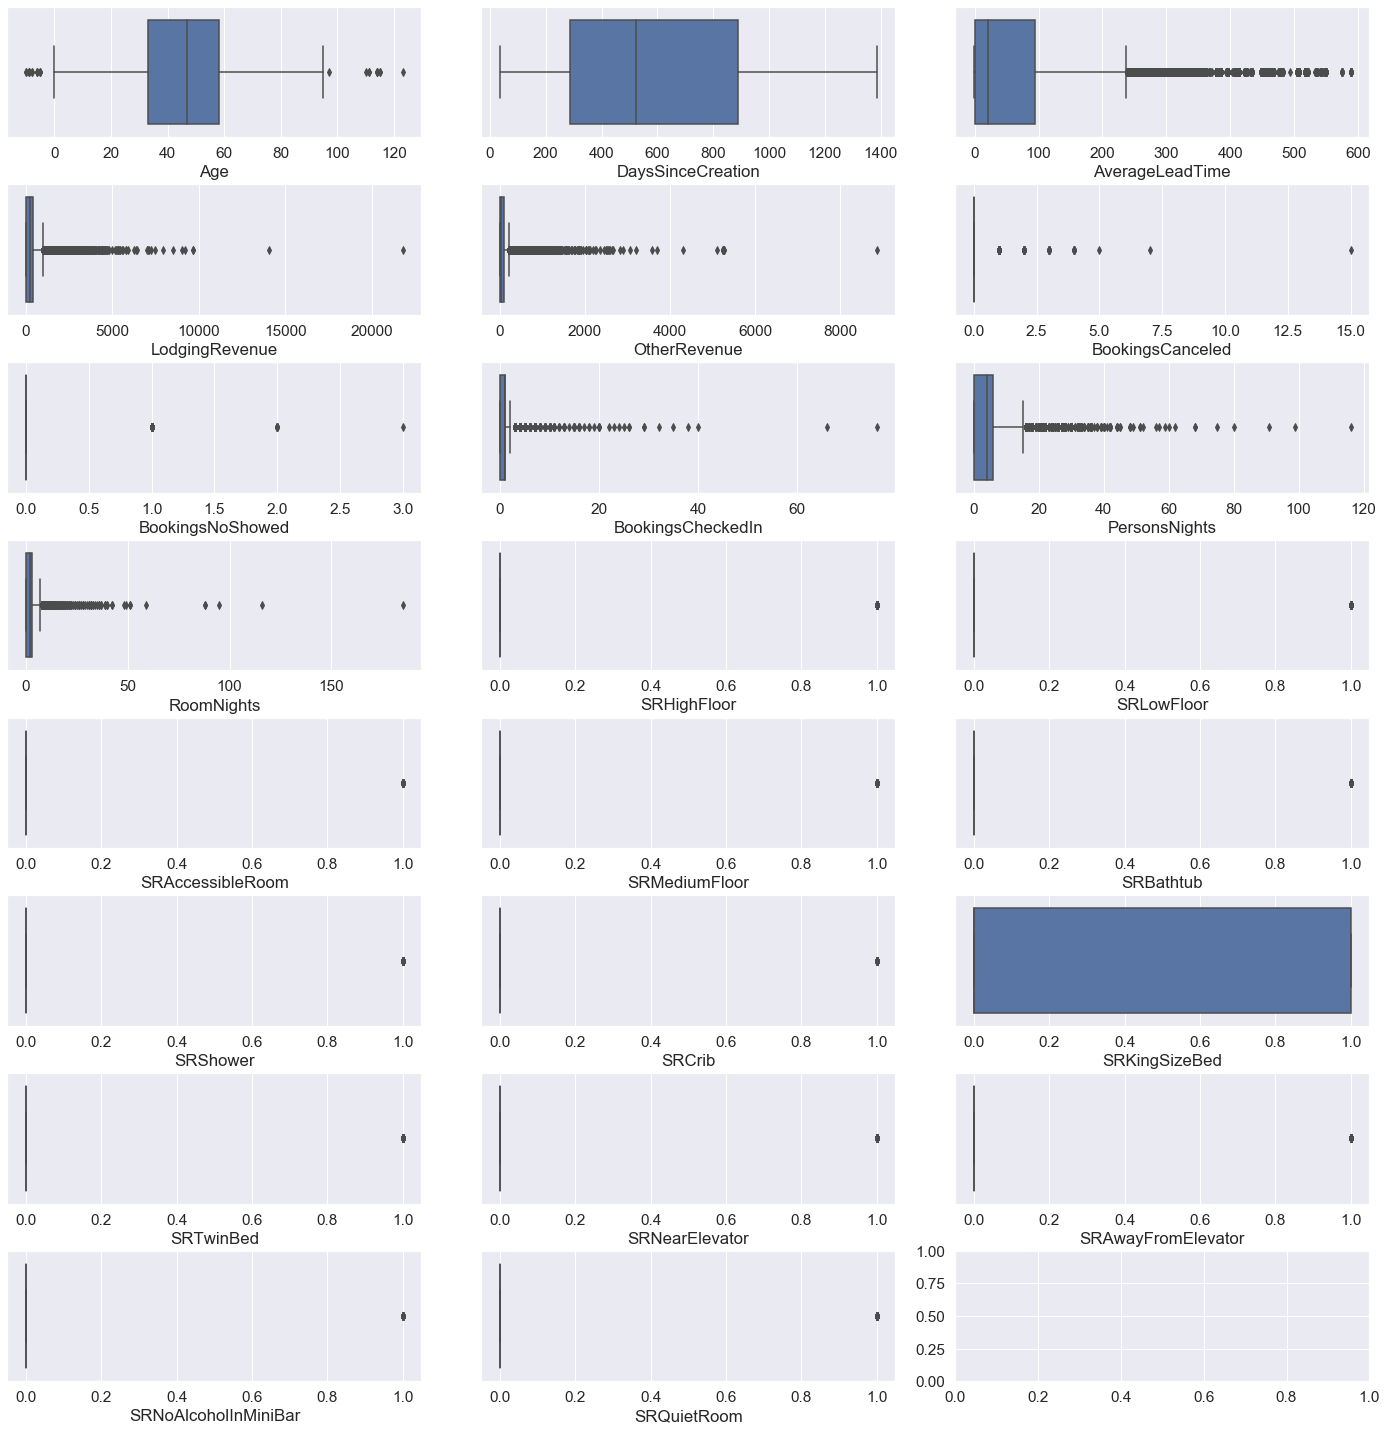

In [62]:
#boxplots to detect outliers
fig, ax = plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

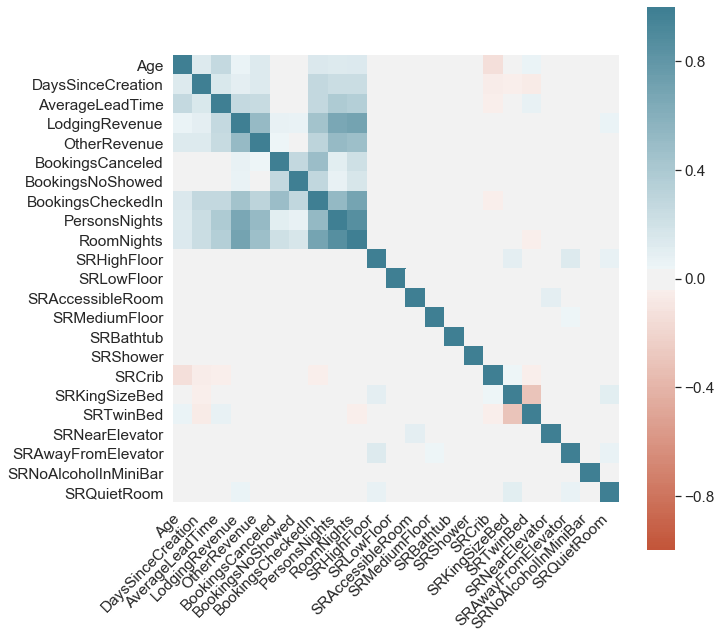

In [63]:
corr = df[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [64]:
# Check DocID NaNs (we will handle them in the Data Preparation part)
df[(df.BookingsCheckedIn != 0) & (df.DocIDHash != df.DocIDHash)].T #Attended bookings but no DocID

df[(df.BookingsCheckedIn == 0) & (df.DocIDHash !=df.DocIDHash)].T #Never attended booking and no DocID

df[(df.BookingsCheckedIn == 0) & (df.BookingsCanceled == 0)& (df.BookingsNoShowed == 0)] #No booking at all

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111724,ITA,56.0,37,0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...,0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
111726,PAN,60.0,37,0xAA3529E305173010BADE927C7015FA091C3883D257E9...,0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...,0,0.0,0.0,0,0,...,0,0,0,0,0,1,1,0,0,0
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Data Preparation

In [65]:
X = df.copy(deep= True)

In [66]:
# Remove MarketSegment because these are our old cluster and we do not want to include them
cols = ['MarketSegment']
X.drop(columns=cols, inplace=True)

In [67]:
# Drop customers with zero revenue but positive checkins, because we assume these are mostly bookings from staff
X = X[~((X.LodgingRevenue == 0)&(X.BookingsCheckedIn >=1))] 

# Drop customers with zero cancellend, no show and checked in bookings, because we assume that these are from older systems
X = X[~((X.BookingsCanceled == 0)&(X.BookingsNoShowed == 0)&(X.BookingsCheckedIn ==0))] 

In [68]:
# Handle duplcates

# Helping aggregation function
def modef(x):
    return x.mode()[0]

aggregation_functions = {'Nationality': modef, 'Age': 'mean', 'DaysSinceCreation': 'first','NameHash': 'first','AverageLeadTime': 'mean'
                        ,'LodgingRevenue': 'sum','OtherRevenue': 'sum','BookingsCanceled': 'sum','BookingsNoShowed': 'sum','BookingsCheckedIn': 'sum','PersonsNights': 'sum','RoomNights': 'sum'
                        ,'DistributionChannel': modef,'SRHighFloor': "last",'SRLowFloor':"last",'SRAccessibleRoom': "last",'SRMediumFloor':"last",
                        'SRBathtub': "last",'SRShower': "last",'SRCrib': "last",'SRKingSizeBed': "last",
                        'SRTwinBed': "last",'SRNearElevator': "last",'SRAwayFromElevator': "last",'SRNoAlcoholInMiniBar': "last",
                        'SRQuietRoom': "last"}

# Create new identifier to find unqiue rows 
X["IDMerge"] = X.DocIDHash + " + " +X.NameHash + " + "+X.Nationality

X_new = X.groupby(X['IDMerge']).aggregate(aggregation_functions)
X_new = X_new.reset_index()

In [69]:
# Outlier handling based on a visual analysis of the boxplots from above

## AverageLeadTime
print(X_new[X_new.AverageLeadTime>360])
# Treat negative AverageLeadTime as real time booking --> AverageLeadTime = 0
X_new["AverageLeadTime"] = X_new["AverageLeadTime"].apply(lambda x: x if x >= 0 else 0)

## LodgingRevenue
print(X_new[X_new.LodgingRevenue > 10000])
# Everything looks fine

## Price per night
#Create a new feature to check for outliers
X_new["PricePerNight"] = X_new.LodgingRevenue / X_new.RoomNights
print(X_new["PricePerNight"])
print(X_new[X_new.PricePerNight > 1500])
# We drop record with PricePerNight smaller than 20, as we assume these are staff bookings too 
X_new = X_new[X_new.PricePerNight > 20]

## OtherRevenue
print(X_new[X_new.OtherRevenue > 4000])
# Everything looks fine

## OtherRevenuePerPersonNight
#Create a new feature to check for outliers
X_new["OtherRevenuePerPersonNight"] = X_new.OtherRevenue / X_new.PersonsNights
print(X_new[X_new["OtherRevenuePerPersonNight"]>1000])
#Remove inf cases (bookings with 0 PersonNights but OtherRevenue > 0)
X_new = X_new[X_new.OtherRevenuePerPersonNight < 10000]

## BookingsCanceled 
print(X_new[X_new.BookingsCanceled > 14])
# Everything looks fine

## BookingsCheckedIn
print(X_new[X_new.BookingsCheckedIn > 30])
# Everything looks fine

## PersonsNights
print(X_new[X_new.PersonsNights > 80])
# Everything looks fine

## RoomNights
print(X_new[X_new.RoomNights > 75])
# Everything looks fine

                                                 IDMerge Nationality   Age  \
279    0x00F5C65409D6F0A78C8088882D4C926A6D9CEFF3CBEA...         USA  78.0   
361    0x013CE29252E0B46E9C057541D4647E6DA86927AA618F...         DEU  65.0   
420    0x016CE9245868D99F3BE2CA225B12F8C7D5D26987BEC5...         AUS  70.0   
429    0x0173633093DCA8BA2848E3C1567A1F0C170DEC12CE97...         DEU  78.0   
499    0x01AD518E836D4781613172F5AA6589A57D2A2842E772...         DEU  59.0   
...                                                  ...         ...   ...   
75371  0xFF01FE6D41778B37D4FD06A26D3BFFD209B8F1CA89D4...         GBR  70.0   
75388  0xFF15C9CEF34547BBEE416BCAE68496DF9AE15C06801F...         AUS  75.0   
75397  0xFF1D12063CE929774160EBC9ADEC37893066B089A277...         DEU  74.0   
75478  0xFF6F5D2CC62F42FB633BAEEE1EED769E735812B1DFD3...         DEU  80.0   
75636  0xFFF5FB703069F8116020446C7AE3EE2E526D17C04BFC...         GBR  70.0   

       DaysSinceCreation                                       

                                                 IDMerge Nationality   Age  \
108    0x0052C2008B9ED3B6CD83E451F2701B88C6686DD4A6CA...         USA  24.0   
30564  0x6AA9D2FAC17257874C7337B5513BC45476D401F1CD8A...         DEU  25.0   
38556  0x87704753FBFAB260B0A26967935D2814FE876512CBF0...         DEU  60.0   
42455  0x953C9840A7D12FA0422C9C11DBED9B0168D9040BDB62...         DEU  49.0   
42921  0x96DFEDA48170EBCBE0A07ED71282576347E0F4F61E79...         FRA  34.0   
46237  0xA2B8B498445C12E8F14DB716F15F92A85412BB4A0C84...         DEU  52.0   
50108  0xAFF482AA746AA502AAF1F1945895A6B42248079B3F3F...         GBR  56.0   
50379  0xB0C98BD253D88E4B16AEAF5A4E4C53AD17CFC32A200D...         SWE  59.0   
51417  0xB48BEED3CAC7125A804A1432B6F77D25EDA2A670030E...         GBR  67.0   
51508  0xB4DAC79F49E9A88AD694039E449E1502E8060CF2DDC2...         PRT  32.0   
60942  0xD5D1BE4622EEF5DE26822943398D9742CF6E8C76DDDE...         GBR  43.0   
67431  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...        

                                                 IDMerge Nationality   Age  \
1473   0x050B3FEBB73D2924810D9C068846F14550B03BCFDC7C...         DEU  52.0   
11364  0x26D9873F94722B27E8274EA01739FD5B066E2D43DC9A...         SWE  67.0   
18970  0x41EA79344A68EA6F481DA8FE4258A3A39C2660AE17E0...         SWE  72.0   
25151  0x57C04BB4D31322994BE4637C5BD2B4FAC9873724B3FF...         SWE  62.0   
29772  0x67D8A25C96313AEF8A5842A87F2F6AB29DE01DAC80BE...         NLD  33.0   
29796  0x67EC94AA7BCFC32094AD0FFAEF4510F033636937F4F7...         SWE  53.0   
36297  0x7F672EE471284723B545B5E0CF6B0399D8B20017DC66...         SWE  78.0   
36729  0x80EEDCDEA548DAF2C3D93B457E628D00165CCC22376C...         SWE  63.0   
36912  0x8186236B5A280E296DC622D0B419BBEBB5BC8E1D4338...         BRA  35.0   
48586  0xAABBAF2E09524F9E7E9D0A74D018AE7507A70950EF3C...         TUR  58.0   
56392  0xC60E0F49074BF142B0B71EF2717F32EF37ED361B0117...         SWE  68.0   
68382  0xE6A266B830C8EE39AF869471D7E11FE6039CFAC8A760...        

In [70]:
X_new[X_new.RoomNights>X_new.PersonsNights]
#Check why this happens w/ teacher

,IDMerge,Nationality,Age,DaysSinceCreation,NameHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,PricePerNight,OtherRevenuePerPersonNight
11593,0x27A6504F8E07DC750D565994E86CB3837146A501E609...,ESP,50.0,736,0x53FB0EB1CE1FD50424F79500C54F8149081D5A3D82F6...,15.250000,1931.00,133.00,0,0,...,0,0,0,0,0,0,0,0,66.586207,13.300000
11923,0x28D83B97B0D5B78BCBA1C36FDF79FF276A1E32C9CB5C...,PRT,34.0,489,0xFB5F026540ECB47362289BB2507D92BED41D80F632F6...,0.000000,459.00,42.00,0,0,...,0,0,1,0,0,0,0,0,38.250000,21.000000
12576,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,PRT,48.0,1323,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,34.066667,11740.65,3066.50,5,1,...,0,0,1,0,0,0,0,0,88.944318,27.379464
18324,0x3FAE56E6A0168E9130F12E58CF45CDAAE18477EF809C...,GRC,52.0,901,0x04F37DBBE0138585CD31BC820E2C780F992915176507...,7.000000,3066.00,347.30,0,0,...,0,0,1,0,0,0,0,0,102.200000,12.403571
22334,0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...,PRT,66.0,1189,0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...,38.000000,1239.00,230.00,4,0,...,0,0,1,0,0,0,0,0,56.318182,11.500000
26848,0x5DC0150F4FDDED43B313C3782560597AC6665A129EF5...,PRT,46.0,466,0x7A8179ADB882FC633830D7EABDCD64D41B3CD539FEA2...,3.000000,269.00,7.00,0,1,...,0,0,1,0,0,0,0,0,134.500000,7.000000
28984,0x6541AF2C1E55C2D3EC17E89DEDD22FE0EBB47AB92305...,PRT,49.0,1112,0xF4F7ED49904EB1F7A72F33A071F96CE533019C81DF96...,0.000000,858.15,114.00,0,0,...,0,0,0,0,0,0,0,0,78.013636,28.500000
37749,0x849546932E0ABE7515ECA03635FD1334BBBCC41E0AFD...,BRA,33.0,319,0x3CBB385BBFE0BCBAC87A0F4FE0BFA648DE33905384F4...,0.000000,524.87,242.50,0,0,...,0,0,0,0,0,0,0,0,87.478333,48.500000
44925,0x9E0C31D4C3A418F0B4E063504160A0B33D51C6ABA0A4...,PRT,NaN,426,0x27749A514C58DA6E2F5544303DD02E378631187B08EF...,97.000000,3123.00,1056.75,0,0,...,0,0,1,0,0,0,0,0,130.125000,52.837500
46913,0xA508EDBFE269E231546629F11587FA2AAD4DE4851A31...,ESP,52.0,929,0xDF5D8EAC38850FC98D7D5822110B10A44662D9D92279...,4.000000,2292.00,402.60,1,0,...,0,0,0,0,0,0,0,0,104.181818,20.130000


In [71]:
#Filling NaNs in Age
X_new[X_new.Age >100 ]
#Drop Nans, negatives and values above 100 and then try to recluster them 
dropped_age = X_new[(X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age)]
X_new = X_new[~((X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age))]


In [72]:
#Feature Engineering 
#Already created the price per room + other revenue per person per night 
X_new["PersonPerRoom"] = X_new.PersonsNights / X_new.RoomNights
X_new["AvgNights"] = X_new.RoomNights / X_new.BookingsCheckedIn
X_new["GroupSize"] = round(X_new.PersonsNights / X_new.BookingsCheckedIn / X_new.AvgNights,0)

In [73]:
#Age Binning
X_new["AgeBinned"] = X_new.Age.apply(lambda x: '0-24' if x >= 0 and x <=24 else ('25-44' if x>=25 and x<=44 else ('45-64' if x>=45 and x<=64 else '65+')))
X_new.AgeBinned.value_counts()

45-64    31603
25-44    26476
65+      11012
0-24      3798
Name: AgeBinned, dtype: int64

In [74]:
#AvgNights binning
#1-2 Short Stay
#3-4 Medium
#5+ Long
X_new["AvgNightsBinning"] = X_new.AvgNights.apply(lambda x: '1-2' if x>=0 and x<=2.5 else ('3-4' if x>2.5 and x<=4.5 else '5+'))
X_new.AvgNightsBinning.value_counts()

3-4    32842
1-2    28736
5+     11311
Name: AvgNightsBinning, dtype: int64

In [75]:
#GroupSize Binning
#1
#2
#3+
X_new["GroupSizeBinned"] = X_new.GroupSize.apply(lambda x: '1' if x ==1  else ('2' if x==2 else '3+'))
X_new.GroupSizeBinned.value_counts()

2     47008
1     15784
3+    10097
Name: GroupSizeBinned, dtype: int64

In [76]:
# AverageLeadTime binning
#0-7
#8-30
#31-120
#121-365
#366+
X_new["LeadTimeBinned"] = X_new.AverageLeadTime.apply(lambda x: '0-7' if x>=0 and x<8 else ('8-30' if x>=8 and x<31 else ('31-120' if x>=31 and x<121 else('121-365' if x>=121 and x<366 else '366+'))))

In [77]:
#DaysSinceCreation binning
#0-60
#60-365
#365-730
#730+
X_new["DaysSinceCreationBinned"] = X_new.DaysSinceCreation.apply(lambda x: '0-120' if x>=0 and x<=120 else ('121-365' if x>=121 and x<=365 else ('366-730' if x>=366 and x<=730 else'731+')))

In [78]:
#PersonPerRoom
#0-1,5
#1,5-2,5
#2,5 +
X_new["PersonPerRoomBinned"] = X_new.PersonPerRoom.apply(lambda x: '1' if x <1.5 else ('2' if x>=1.5 and x<2.5 else '3+'))

In [79]:
#'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed','SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom'
#Creature one summary for feature  SR Location and SE Equipment

X_new["SRLocation"] = X_new["SRHighFloor"] + X_new["SRQuietRoom"]+X_new["SRLowFloor"] + X_new["SRMediumFloor"] + X_new["SRNearElevator"] + X_new["SRAwayFromElevator"]
X_new["SREquipment"] = X_new["SRAccessibleRoom"] + X_new["SRBathtub"] + X_new["SRShower"] + X_new["SRCrib"] + X_new["SRKingSizeBed"] + X_new["SRTwinBed"] + X_new["SRNoAlcoholInMiniBar"]
X_new.SRLocation = X_new.SRLocation.apply(lambda x: 1 if x>=1 else 0)
X_new.SREquipment = X_new.SREquipment.apply(lambda x: 1 if x>=1 else 0)

In [80]:
# Create new nationality feature
# Remain most common countries (PRT, DEU, GBR, FRA) otherwise use EU or Rest of the World (ROW)

cc_alpha2 = [pc.country_alpha3_to_country_alpha2(x) if x != "TMP" else  "AQ" for x in X_new["Nationality"].values] 
X_new["Nationality2"] = [pc.country_alpha2_to_continent_code(x) if x not in ["AQ", "PN", "TF", "UM"] else "Undefined" for x in cc_alpha2] 
X_new["Nationality2"] = [X_new.Nationality2[i] if X_new.Nationality[i] not in ["PRT","GBR","DEU","FRA"] else X_new.Nationality[i]  for i in X_new.index.values] 
X_new["Nationality2"] = X_new["Nationality2"].apply(lambda x: x if x not in ["NA", "SA", "AF", "OC", "AS", "Undefined"] else "ROW") 
X_new["Nationality2"].value_counts() 

EU     24325
ROW    12085
FRA    11271
DEU    10276
GBR     7864
PRT     7068
Name: Nationality2, dtype: int64

In [81]:
# Create new DistributionChannel for better distribution
X_new["DistributionChannelNew"] = X_new.DistributionChannel.apply(lambda x: x if x == "Travel Agent/Operator" else "Other")
X_new["DistributionChannelNew"].value_counts()

Travel Agent/Operator    60341
Other                    12548
Name: DistributionChannelNew, dtype: int64

In [82]:
#OneHotEncode the categorical variables,
categoricals = ["DistributionChannelNew", "DistributionChannel","Nationality2", "GroupSizeBinned","AgeBinned","LeadTimeBinned", "DaysSinceCreationBinned","PersonPerRoomBinned", "AvgNightsBinning"]

dummies = pd.get_dummies(X_new[categoricals], prefix_sep='_')
X_new_2 = X_new.merge(dummies, left_index = True, right_index=True )

In [83]:
#Drop unnecessary columns for PCA
X_new_2.drop(["DistributionChannelNew", "IDMerge", "Nationality","GroupSizeBinned","GroupSize","PersonsNights","AvgNights","RoomNights","AvgNightsBinning","BookingsCheckedIn","BookingsNoShowed","BookingsCanceled","PersonPerRoom","PersonPerRoomBinned", "Age",
              "DaysSinceCreationBinned","DaysSinceCreation","AgeBinned","LodgingRevenue","OtherRevenue", "LeadTimeBinned", "NameHash","AverageLeadTime",
              "DistributionChannel",'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 
              'SRCrib', 'SRKingSizeBed','SRTwinBed', 'SRNearElevator', "Nationality2",'SRAwayFromElevator',
              'SRNoAlcoholInMiniBar', 'SRQuietRoom'],axis=1, inplace=True)


In [84]:
#Standardize with MinMax
X_model = X_new_2.copy(deep=True)

cols = list(X_model.columns) # save the name of the columns 

X_model_array = X_model.values # returns a numpy array 

min_max_scaler = preprocessing.MinMaxScaler() 

X_model_scaled = min_max_scaler.fit_transform(X_model_array) 

X_model_norm = pd.DataFrame(X_model_scaled, columns=cols) 
X_model_norm.head(1).T

,0
PricePerNight,0.064845
OtherRevenuePerPersonNight,0.018855
SRLocation,1.000000
SREquipment,1.000000
DistributionChannelNew_Other,1.000000
DistributionChannelNew_Travel Agent/Operator,0.000000
DistributionChannel_Corporate,0.000000
DistributionChannel_Direct,1.000000
DistributionChannel_GDS Systems,0.000000
DistributionChannel_Travel Agent/Operator,0.000000


(72889, 2)


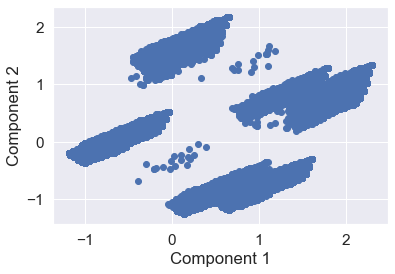

In [85]:
#PCA
pca2 = PCA(n_components = 2)
pca2.fit(X_model_norm)
X_pca2 = pca2.transform(X_model_norm) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2');


In [86]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X_model_norm)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X_model_norm.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.149172,0.149172
1,2,0.095862,0.245033
2,3,0.081731,0.326764
3,4,0.074145,0.400909
4,5,0.067382,0.468291
5,6,0.061130,0.529420
6,7,0.058409,0.587829
7,8,0.049378,0.637207
8,9,0.043379,0.680586
9,10,0.039815,0.720401


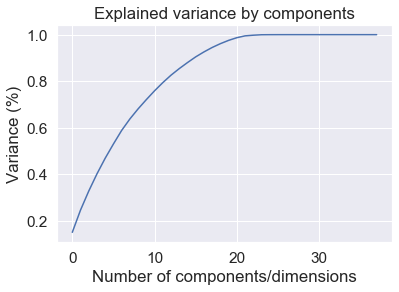

PC1: 0.14917165437151306
PC2: 0.24503331376502754
PC3: 0.3267638722759231
PC4: 0.4009086638034003
PC5: 0.468290601949398
PC6: 0.5294201559766274
PC7: 0.5878289625593178
PC8: 0.6372069680602643
PC9: 0.6805861772535836
PC10: 0.7204013459726588
PC11: 0.758381851976252
PC12: 0.7935005748191155
PC13: 0.8256195193635315
PC14: 0.8538591501928708
PC15: 0.8797966541605605
PC16: 0.9043864426656228
PC17: 0.9256443577204113
PC18: 0.9447809058584196
PC19: 0.9612058948699993
PC20: 0.975402387478992
PC21: 0.9869266483132823
PC22: 0.9948557280253155
PC23: 0.9976745089829548
PC24: 0.99957962620704
PC25: 0.9998583723757937
PC26: 0.9999501045529513
PC27: 0.9999909008021837
PC28: 1.0
PC29: 1.0
PC30: 1.0
PC31: 1.0
PC32: 1.0
PC33: 1.0
PC34: 1.0
PC35: 1.0
PC36: 1.0
PC37: 1.0
PC38: 1.0


In [87]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

# Modelling

In [88]:
#Running Kmeans based on 21 PCAs, because these explain rounded 99% of the variance of the original data
pca_reduced = PCA(n_components = 21)
pca_reduced.fit(X_model_norm)
X_pca_reduced = pca_reduced.transform(X_model_norm) 
print(X_pca_reduced.shape)

(72889, 21)


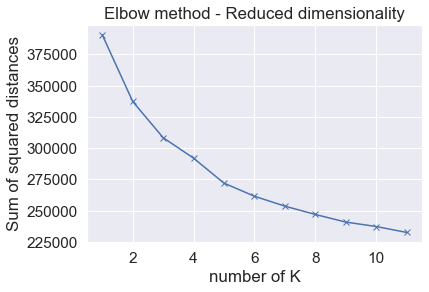

In [89]:
# Select K based on the sum of squared distances 

ssd = [] 
K = range(1,12) 
for k in K: 
    km = KMeans(n_clusters=k, random_state=123) 
    km = km.fit(X_pca_reduced) 
    ssd.append(km.inertia_) 

# Plot results in an elbow graph 
plt.plot(K, ssd, 'bx-') 
plt.xlabel('number of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow method - Reduced dimensionality') 
plt.show() 

In [90]:
# Apply the K-Means for K= 6 
K = 6

kmeans = KMeans(n_clusters=K, random_state=120) 
kmeans.fit(X_pca_reduced) 

y_kmeans = kmeans.predict(X_pca_reduced) 


X_new["Cluster"] = y_kmeans

In [92]:
X_new.Cluster.value_counts()

2    15288
1    13366
3    12544
0    11788
4    11603
5     8300
Name: Cluster, dtype: int64

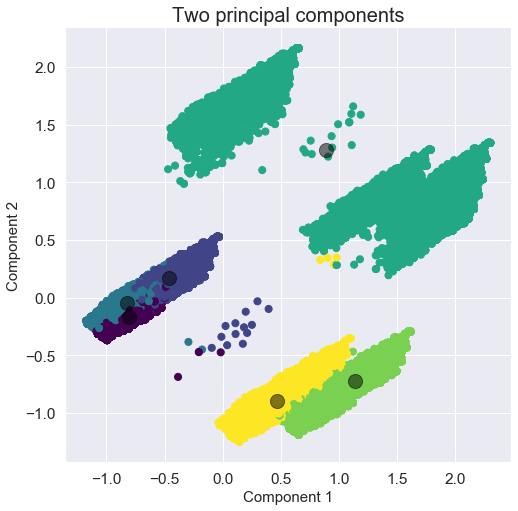

In [93]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [94]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X_model_norm.columns)
wheightsDF

,PricePerNight,OtherRevenuePerPersonNight,SRLocation,SREquipment,DistributionChannelNew_Other,DistributionChannelNew_Travel Agent/Operator,DistributionChannel_Corporate,DistributionChannel_Direct,DistributionChannel_GDS Systems,DistributionChannel_Travel Agent/Operator,...,DaysSinceCreationBinned_0-120,DaysSinceCreationBinned_121-365,DaysSinceCreationBinned_366-730,DaysSinceCreationBinned_731+,PersonPerRoomBinned_1,PersonPerRoomBinned_2,PersonPerRoomBinned_3+,AvgNightsBinning_1-2,AvgNightsBinning_3-4,AvgNightsBinning_5+
0,6.323896e-03,5.725964e-04,-3.947376e-02,-1.869752e-01,0.189294,-0.189294,0.053988,0.118113,0.017193,-0.189294,...,-0.008110,0.041162,0.024660,-0.057711,0.360349,-0.464521,0.104172,0.201670,-0.171340,-0.030330
1,-3.528734e-05,3.351773e-04,-3.384026e-02,-9.984371e-02,0.423539,-0.423539,0.048916,0.363631,0.010993,-0.423539,...,0.002104,0.020984,0.020856,-0.043945,-0.126904,0.283191,-0.156288,0.135936,-0.136898,0.000962
2,4.368028e-03,-6.025935e-04,9.331331e-03,-1.215822e-01,0.178751,-0.178751,0.009187,0.168232,0.001333,-0.178751,...,-0.004579,-0.000067,0.042564,-0.037918,-0.080713,-0.095963,0.176675,-0.497808,0.489212,0.008596
3,1.687355e-03,-1.089158e-03,-9.881392e-03,2.834003e-02,0.002252,-0.002252,-0.002301,0.000903,0.003651,-0.002252,...,-0.001428,0.120239,0.210197,-0.329008,0.058137,-0.014196,-0.043941,-0.230076,0.273979,-0.043903
4,-2.708571e-03,-6.193880e-04,-9.607287e-03,-8.421467e-02,0.039072,-0.039072,0.006279,0.035626,-0.002833,-0.039072,...,-0.045864,-0.128970,-0.512400,0.687234,-0.072832,-0.045273,0.118106,-0.037023,0.063050,-0.026026
5,1.193723e-02,-9.685101e-04,3.410565e-02,2.305770e-01,0.048972,-0.048972,-0.029900,0.087250,-0.008378,-0.048972,...,0.070469,-0.058499,0.102920,-0.114890,-0.307681,-0.126313,0.433994,0.041714,-0.141610,0.099896
6,-6.949994e-03,1.191974e-03,-2.928085e-02,-1.193154e-01,0.018754,-0.018754,0.020325,-0.006002,0.004432,-0.018754,...,0.021530,-0.004902,-0.124510,0.107881,0.170778,0.000962,-0.171740,-0.256420,0.321122,-0.064702
7,-3.397270e-03,8.049360e-04,-6.037790e-02,-9.100600e-02,0.020127,-0.020127,-0.002417,0.025264,-0.002720,-0.020127,...,0.016355,0.047794,-0.041327,-0.022822,0.009906,-0.063046,0.053140,-0.104452,0.094659,0.009793
8,3.529098e-03,-5.222343e-05,9.652799e-02,6.267751e-01,0.041628,-0.041628,0.009363,0.028929,0.003336,-0.041628,...,0.006714,0.298908,-0.265384,-0.040238,0.013684,-0.015267,0.001583,-0.010034,0.174734,-0.164700
9,-2.263621e-03,2.307762e-03,3.873205e-02,3.824263e-01,0.078099,-0.078099,0.006114,0.068022,0.003963,-0.078099,...,0.101866,0.268866,-0.314018,-0.056714,0.131887,-0.050459,-0.081428,-0.093595,-0.148830,0.242426


In [95]:
# Study the weights of component 21
comp = abs(wheightsDF.iloc[20]) 
comp = comp.sort_values(ascending=False)
comp

AgeBinned_0-24                                  0.827108
AgeBinned_65+                                   0.360806
AgeBinned_25-44                                 0.235871
AgeBinned_45-64                                 0.230431
DaysSinceCreationBinned_0-120                   0.220680
DaysSinceCreationBinned_731+                    0.081252
DaysSinceCreationBinned_366-730                 0.069952
DaysSinceCreationBinned_121-365                 0.069476
Nationality2_PRT                                0.044608
Nationality2_DEU                                0.041316
Nationality2_ROW                                0.037867
LeadTimeBinned_121-365                          0.033352
AvgNightsBinning_5+                             0.029075
LeadTimeBinned_366+                             0.025132
AvgNightsBinning_1-2                            0.021823
Nationality2_EU                                 0.020948
DistributionChannel_Corporate                   0.020110
Nationality2_FRA               

In [ ]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(X_model[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

In [ ]:
X_new.AgeBinned.value_counts()